In [26]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

In [27]:
bs = pd.read_csv("./SVM5G_Datasets/BS.csv")
users = pd.read_csv("./SVM5G_Datasets/Users.csv")

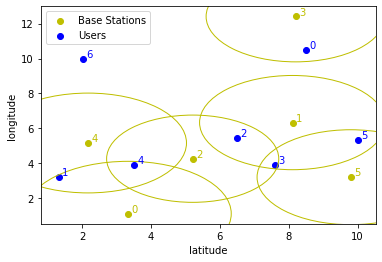

In [46]:
def plotPositions(users, bs, connections = None):

    BSPos = bs[['BSLat','BSLon']]
    UPos = users[['ULat','ULon']]

    fig, ax = plt.subplots()
    
    # Plotting BS and Users positions 
    ax.scatter(BSPos['BSLon'],BSPos['BSLat'], color='y')
    ax.scatter(UPos['ULon'], UPos['ULat'], color='b')
    plt.ylabel('longitude')
    plt.xlabel('latitude')
    ax.legend(['Base Stations', 'Users'])
    
    for i,j in bs.iterrows():
        
        # Plotting BS range
        pos = (j['BSLon'], j['BSLat'])
        circle = plt.Circle(pos, j['BSRange'], color='y', fill=False)
        ax.add_artist(circle)
        
        #Plotting BS index
        ax.annotate(i, (j['BSLon']+0.1, j['BSLat']+0.1), color='y')
        
    for i,j in users.iterrows():
        
        #Plotting user index
        ax.annotate(i, (j['ULon']+0.1, j['ULat']+0.1), color='b')

    if(connections is not None):
        for ui, uj  in connections.iterrows():
            if(not math.isinf(uj['minPathLoss'])):
                bsi = int(uj['BS'])
                lat1, lat2 = UPos.iloc[ui]['ULat'], BSPos.iloc[bsi]['BSLat']
                lon1, lon2 = UPos.iloc[ui]['ULon'], BSPos.iloc[bsi]['BSLon']
                ax.plot([lon1,lon2],[lat1,lat2], color='b', alpha=0.2)
        
plotPositions(users, bs)

Computing distances between users (rows) and BS (columns):

In [70]:
def computeDistance(lat1, lon1, lat2, lon2):
    return math.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

def computePathLoss(distance, gamma = 3):
    return 10*gamma*math.log10(distance)

def computePathLosses():
    pathLosses = pd.DataFrame()
    for ui,uj in users.iterrows():
        for bsi,bsj in bs.iterrows():
            dist = computeDistance(uj['ULat'], uj['ULon'], bsj['BSLat'], bsj['BSLon'])
            pathLoss = computePathLoss(dist)
            if(dist <= bsj['BSRange']):
                pathLosses.at[ui,bsi] = pathLoss
            else:
                pathLosses.at[ui,bsi] = math.inf
                
    return pathLosses
        

pathLosses = computePathLosses()
    
pathLosses.head(20)

,0,1,2,3,4,5
0,inf,inf,inf,8.589764,inf,inf
1,13.935303,inf,inf,inf,9.778034,inf
2,inf,7.907679,7.328684,inf,inf,inf
3,inf,11.940806,11.567637,inf,inf,10.812928
4,13.301843,inf,7.231092,inf,8.037004,inf
5,inf,9.955514,inf,inf,inf,9.914404
6,inf,inf,inf,inf,inf,inf


In [66]:
minPathLosses = pd.DataFrame()
minPathLosses['BS'] = pathLosses.idxmin(axis=1)
minPathLosses['minPathLoss'] = pathLosses.min(axis=1)

minPathLosses.head(20)

,BS,minPathLoss
0,3,8.589764
1,4,9.778034
2,2,7.328684
3,5,10.812928
4,2,7.231092
5,5,9.914404
6,0,inf


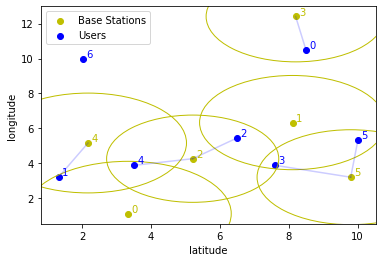

In [67]:
plotPositions(users, bs, minPathLosses)